In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Warning Supression

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('TelcoChurn.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [3]:
# Checking for shape
df.shape

(7043, 21)

In [4]:
# Checking the datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
# Setting display options to ensure feature name visibility
pd.set_option('display.max_columns', None)

In [6]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [7]:
# Since customerID is not deciding factor in churn, we will drop that column
# Coz it doesn't play an important relationship between x(independant) and y(dependant)

In [8]:
# But before that we will have to see for null values in that row
# If there is a null value in that particular column we will have to drop the entire row coz it may be an invalid sample/data.
# You should check the null value for the primary key and drop that particular key
df['customerID'].isnull().sum()

0

In [9]:
# Droping customerID feature from the dataset
df = df.drop(['customerID'], axis=1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [10]:
# Label the churn feature to 1/0
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
df['target'] = np.where(df['Churn']=='Yes', 1, 0)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0


In [12]:
# Droping the Churn feature to retain only Target
df = df.drop(['Churn'], axis=1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [13]:
# Defining Target and Independant features
Y = df[['target']]
X = df.drop(['target'], axis=1)

In [14]:
Y.head(2)

,target
0,0
1,0


In [15]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50


In [16]:
# Getting the Churn rate
Y.mean()

target    0.26537
dtype: float64

In [17]:
# Splitting the independant features into Numerical and Categorical
num = X.select_dtypes(include='number')
char = X.select_dtypes(include='object')

In [18]:
num.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50


In [19]:
# Here SeniorCitizen is categorical

In [20]:
# Checking whether SeniorCitizen feature is an indicator
num['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [21]:
# Droping the categorical(SeniorCitizen) from the numerical dataset to buil a separate DF
ind = num[['SeniorCitizen']]
num = num.drop(['SeniorCitizen'], axis=1)

In [22]:
ind.head(2)

,SeniorCitizen
0,0
1,0


In [23]:

num.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


In [24]:
char.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check


In [25]:
# Outlier Analysis of Numerical Features
num.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.30, 0.40, 0.50, 0.60, 0.75, 0.85, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
tenure,7043.0,32.371149,24.559481,0.00,1.000,1.00,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.000,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.200,19.65,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.400,114.729,118.75
TotalCharges,7043.0,2279.798992,2266.730170,18.80,19.871,49.07,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6921.025,8039.256,8684.80


In [26]:
# Capping and Flooring of outliers
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.05))
    x = x.clip(upper=x.quantile(0.95))
    return(x)

In [27]:
num = num.apply(lambda x: outlier_cap(x))

In [28]:
num.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.30, 0.40, 0.50, 0.60, 0.75, 0.85, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,95%,99%,max
tenure,7043.0,32.372710,24.557454,1.00,1.00,1.000,2.00,9.00,12.00,20.00,29.00,40.00,55.00,65.000,69.00,72.0000,72.000,72.000
MonthlyCharges,7043.0,64.566357,29.747902,19.65,19.65,19.650,20.05,35.50,45.85,58.83,70.35,79.10,89.85,98.550,102.60,107.4000,107.400,107.400
TotalCharges,7043.0,2246.127358,2185.556691,49.07,49.07,49.088,83.47,398.55,548.40,939.78,1394.55,2043.71,3786.60,5195.485,5973.69,6920.4175,6921.025,6921.025


In [29]:
# Missing Value Analysis
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [30]:
# Since the data does not contain any missing values imputation processes are not required
# In case of categorical value = MODE is used for imputation
# In case of numerical value = Median is used for imputation

# Feature Selection - Numerical Features

In [31]:
# Removing Features with 0 Variance
# If the variance is very high or very low that particular colulmn also doesn't make any sense.

from sklearn.feature_selection import VarianceThreshold

varselector = VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]
num_1.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,49.07
1,34.0,56.95,1889.50


In [32]:
# Bi Variate Analysis(Feature Discretization)
from sklearn.preprocessing import KBinsDiscretizer
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head(2)

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0


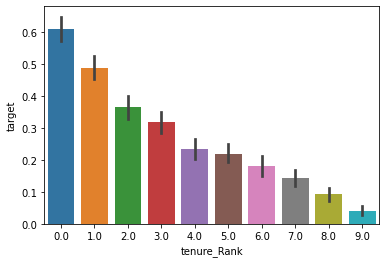

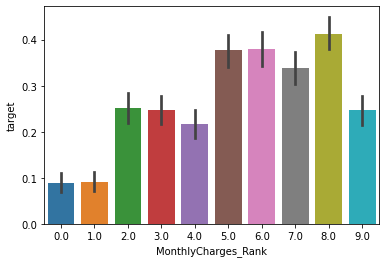

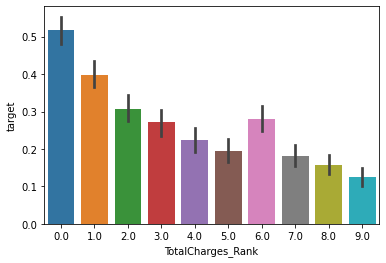

In [33]:
# Check if the features show a slope at all
# If they do, then do you see some deciles below the population average and some higher than population average?
# If that is the case then the slope will be strong
# Conclusion: A strong slope is indicative of the feature's ability to discriminate the event from non event, 
#  making it a good predictor.
# Percentage_income_goes into_installements = Installment/annual_inc(Derived variables/Feature Engineering) 

x_bin_combined = pd.concat([Y, num_binned], axis=1, join='inner')

for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y='target', data=x_bin_combined, estimator=np.mean)
plt.show()

In [34]:
# More the tenure rank less the churning rate(Fig. 1)

In [35]:
# As the monthly charges increases churning rate also increases(Fig. 2)

In [36]:
# As the Total charges increases churning rate decreases(Fig. 3)

In [37]:
# All features from num_1 will get selected due to good discrimination
select_features_df_num = num_1

In [38]:
num_1.shape

(7043, 3)

In [39]:
# Feature selection - Categorical Features
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

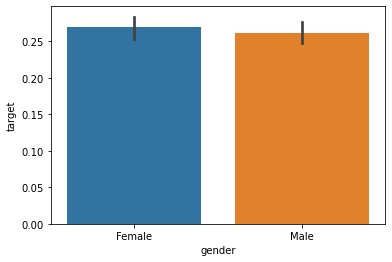

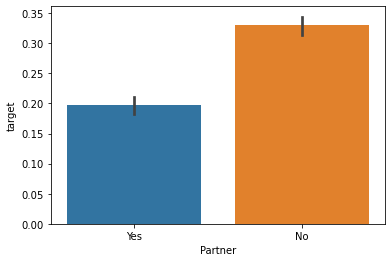

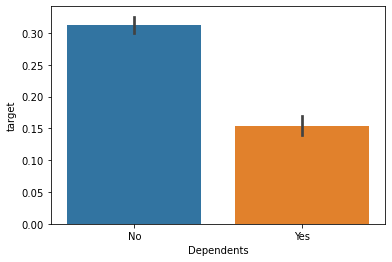

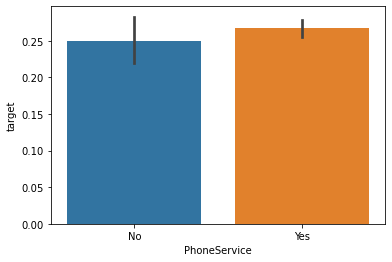

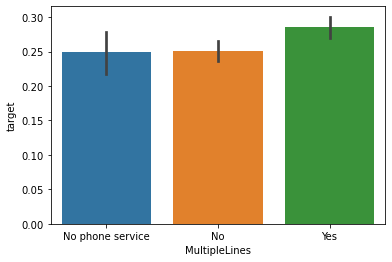

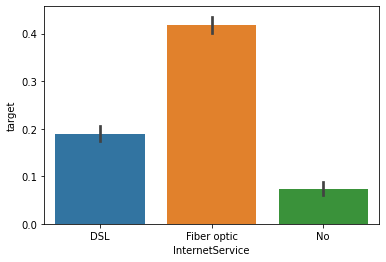

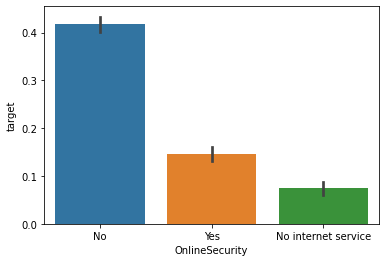

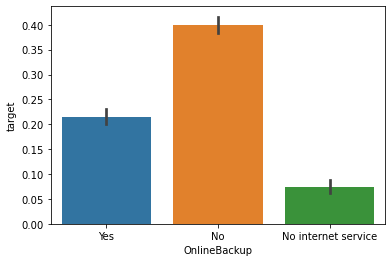

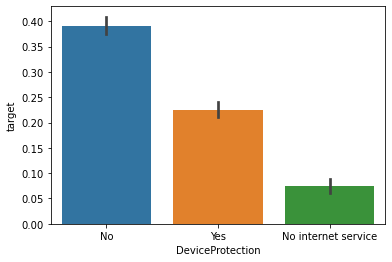

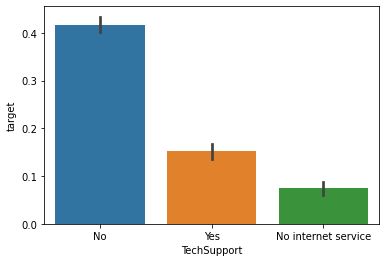

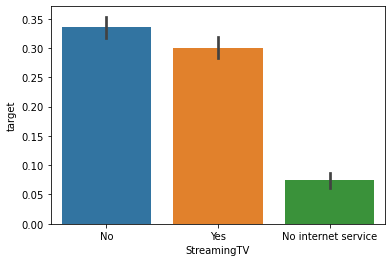

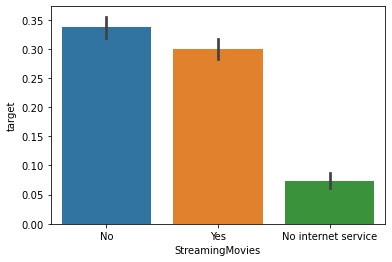

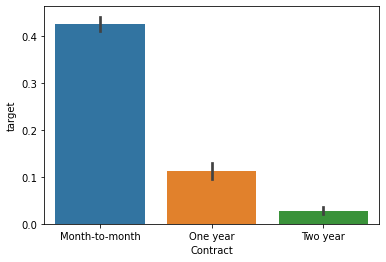

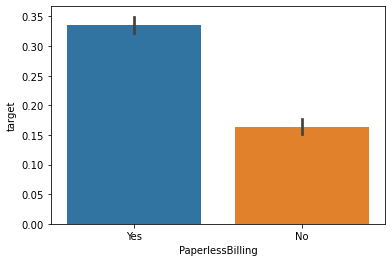

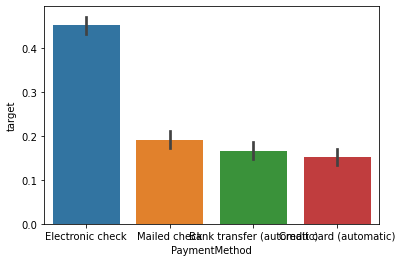

In [40]:
# Bi Variate Analysis0
X_char_merged = pd.concat([Y, char], axis=1, join='inner')

for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y='target', data=X_char_merged, estimator=np.mean)
plt.show()

In [41]:
char = char.drop(['gender', 'PhoneService', 'MultipleLines'], axis=1)

In [42]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

In [43]:
X_char_dum.head(2)

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [44]:
# Select K Best
# Select K best for categorical featrues
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:, cols]
select_features_df_char.head(2)

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [45]:
select_features_df_char.shape

(7043, 20)

# Feature Selection - Numerical Indicator Features

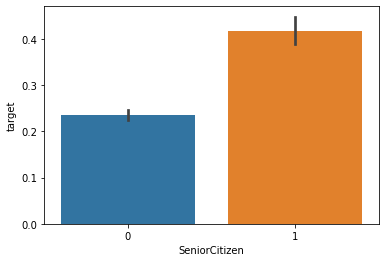

In [46]:
X_ind_merged = pd.concat([Y, ind], axis=1, join='inner')
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y='target', data=X_ind_merged, estimator=np.mean)
plt.show()

In [47]:
select_features_df_ind = ind

In [48]:
# Creating a Master Feature Set for Model Development
X_all = pd.concat([select_features_df_char, select_features_df_num, select_features_df_ind], axis=1, join='inner')
X_all.head(2)

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1.0,29.85,49.07,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,34.0,56.95,1889.50,0


In [49]:
X_all.shape

(7043, 24)

In [50]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

In [51]:
# Train_Test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [52]:
print('Shape of training data: ', X_train.shape)
print('Shape of testing data: ', X_test.shape)
print('Response rate in training data: ', y_train.mean())
print('Response rate in testing data: ', y_test.mean())

Shape of training data:  (4930, 24)
Shape of testing data:  (2113, 24)
Response rate in training data:  target    0.266126
dtype: float64
Response rate in testing data:  target    0.263606
dtype: float64


In [53]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White box(completely explainable set of rules) - Decision Tress
# Ensembel methods - Random Forest(with Bagging)
# Ensemble methods - GBM/XGBoost (Boosting)

In [54]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [55]:
coeff_df = pd.DataFrame(X_all.columns)
coeff_df.columns = ['features']
coeff_df['Coefficient Estimate'] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,-0.039816
1,Dependents_Yes,-0.197201
2,InternetService_Fiber optic,0.473465
3,InternetService_No,-0.158345
4,OnlineSecurity_No internet service,-0.158345
5,OnlineSecurity_Yes,-0.530995
6,OnlineBackup_No internet service,-0.158345
7,OnlineBackup_Yes,-0.253853
8,DeviceProtection_No internet service,-0.158345
9,DeviceProtection_Yes,-0.143937


In [56]:
# Building a decision tree model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', random_state=0)

In [57]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split':[50, 100, 150, 200, 250]}
tree_grid = GridSearchCV(dtree, cv=10, param_grid = param_dist, n_jobs = 3)
tree_grid.fit(X_train, y_train)
print('Best parameters using grid search: \n', tree_grid.best_params_)

Best parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [58]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 6, min_samples_split=50)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

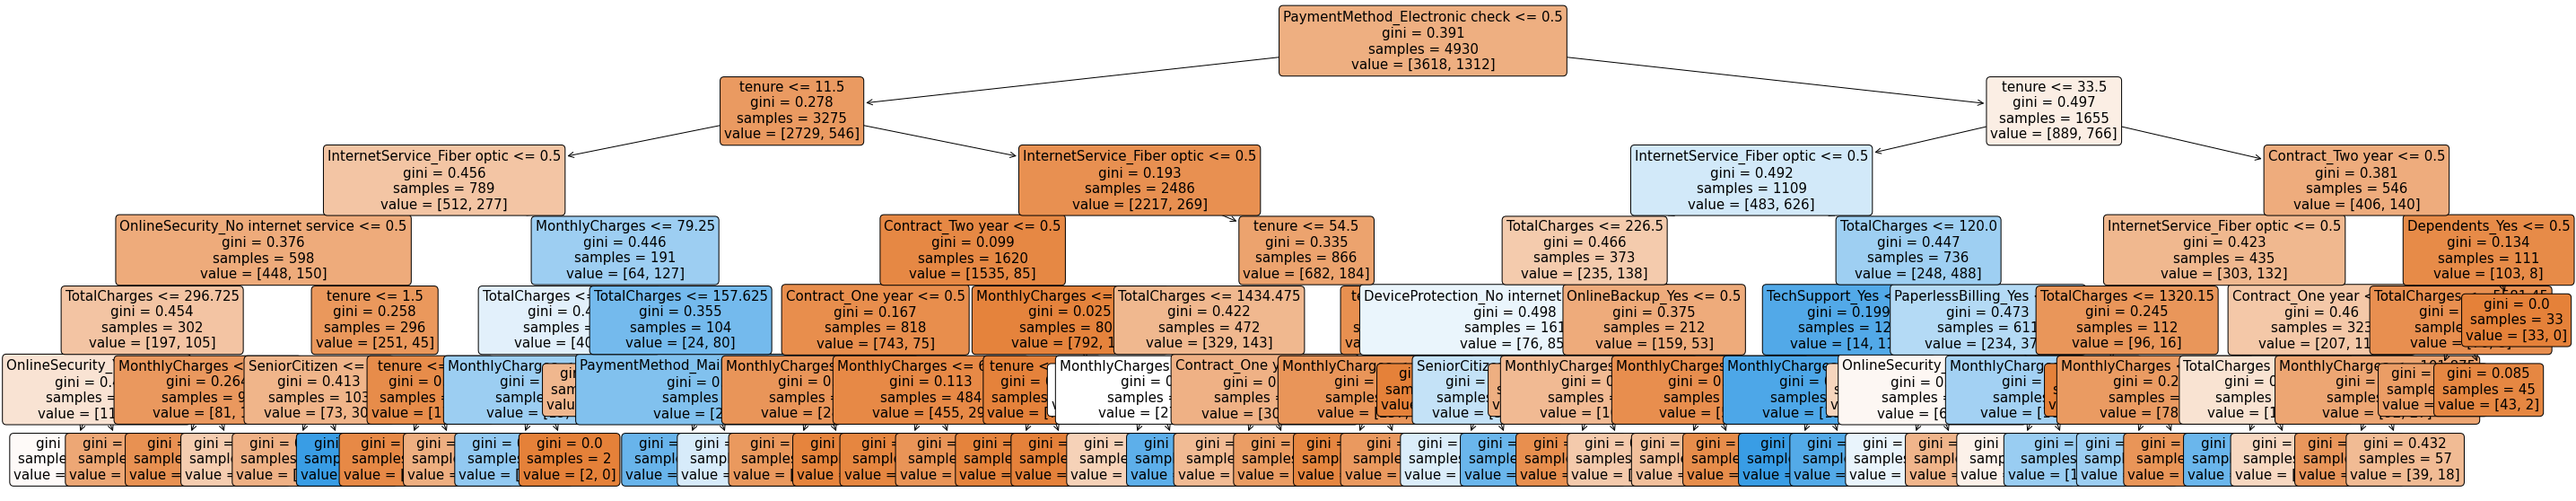

In [59]:
from sklearn import tree
# import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50, 10])
tree.plot_tree(dtree, filled=True, fontsize=15, rounded=True, feature_names = X_all.columns)
plt.show()

In [60]:
# Building a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini', random_state = 0, max_depth = 6, min_samples_split = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [61]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
tenure,0.202032
TotalCharges,0.142111
InternetService_Fiber optic,0.116127
PaymentMethod_Electronic check,0.088409
MonthlyCharges,0.083951
Contract_Two year,0.076683
OnlineSecurity_Yes,0.038407
Contract_One year,0.036622
InternetService_No,0.028763
TechSupport_Yes,0.028533


In [62]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(criterion='mse', random_state=0, max_depth=6, min_samples_split=50)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [63]:
import pandas as pd
feature_importances = pd.DataFrame(gbm.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
tenure,0.213507
MonthlyCharges,0.178987
TotalCharges,0.166517
PaymentMethod_Electronic check,0.135038
InternetService_Fiber optic,0.128263
Contract_Two year,0.035086
Contract_One year,0.033599
PaperlessBilling_Yes,0.019744
OnlineSecurity_Yes,0.016785
TechSupport_Yes,0.014640


In [64]:
base_learners = [
    ('rf', RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=50)), 
    ('gbm', GradientBoostingClassifier(criterion='mse', random_state=0, max_depth=6, min_samples_split=50))
]

In [65]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [66]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [67]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [68]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [69]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_logreg))
print('Precision: ', metrics.precision_score(y_test, y_pred_logreg))
print('Recall: ', metrics.recall_score(y_test, y_pred_logreg))
print('f1_score: ', metrics.f1_score(y_test, y_pred_logreg))

Accuracy:  0.7974443918599148
Precision:  0.6405228758169934
Recall:  0.5278276481149012
f1_score:  0.5787401574803149


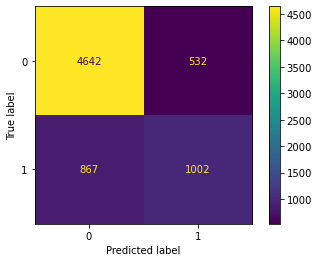

In [70]:
metrics.plot_confusion_matrix(logreg, X_all, Y)

In [71]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_tree))
print('Precision: ', metrics.precision_score(y_test, y_pred_tree))
print('Recall: ', metrics.recall_score(y_test, y_pred_tree))
print('f1_score: ', metrics.f1_score(y_test, y_pred_tree))

Accuracy:  0.7950780880265026
Precision:  0.6483253588516746
Recall:  0.4865350089766607
f1_score:  0.5558974358974359


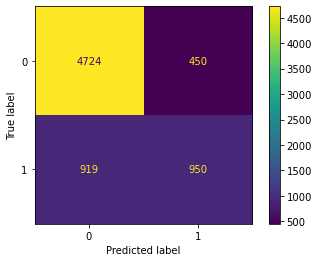

In [72]:
metrics.plot_confusion_matrix(dtree, X_all, Y)

In [73]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_rf))
print('Precision: ', metrics.precision_score(y_test, y_pred_rf))
print('Recall: ', metrics.recall_score(y_test, y_pred_rf))
print('f1_score: ', metrics.f1_score(y_test, y_pred_rf))

Accuracy:  0.7998106956933271
Precision:  0.6700507614213198
Recall:  0.473967684021544
f1_score:  0.5552050473186119


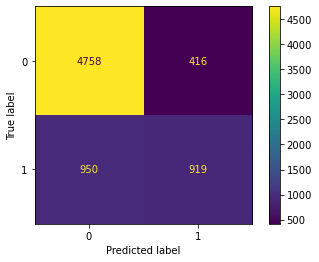

In [74]:
metrics.plot_confusion_matrix(rf, X_all, Y)

In [75]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_gbm))
print('Precision: ', metrics.precision_score(y_test, y_pred_gbm))
print('Recall: ', metrics.recall_score(y_test, y_pred_gbm))
print('f1_score: ', metrics.f1_score(y_test, y_pred_gbm))

Accuracy:  0.7998106956933271
Precision:  0.6437768240343348
Recall:  0.5385996409335727
f1_score:  0.5865102639296188


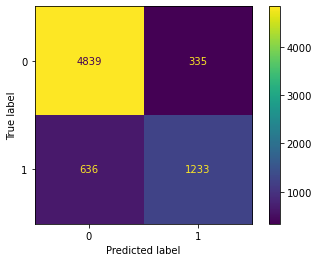

In [76]:
metrics.plot_confusion_matrix(gbm, X_all, Y)

In [77]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_stacking))
print('Precision: ', metrics.precision_score(y_test, y_pred_stacking))
print('Recall: ', metrics.recall_score(y_test, y_pred_stacking))
print('f1_score: ', metrics.f1_score(y_test, y_pred_stacking))

Accuracy:  0.7983909133932797
Precision:  0.6519721577726219
Recall:  0.5044883303411131
f1_score:  0.5688259109311742


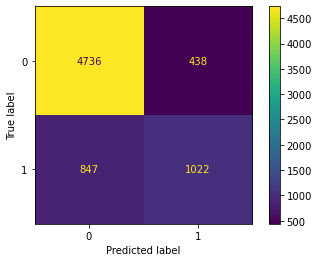

In [78]:
metrics.plot_confusion_matrix(clf, X_all, Y)

# Lorenz Curve

In [79]:
# Decision Tree Lorenz Curve

In [80]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
df['pred_prob_logreg'] = pd.DataFrame(y_pred_prob)
df['P_Rank_logreg'] = pd.qcut(df['pred_prob_logreg'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_logreg')['target'].agg(['count', 'mean'])
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actutal_event_rate'}, inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'}, inplace=True)
rank_df=pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join='inner')

sorted_rank_df= rank_df.sort_values(by='P_Rank_logreg', ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.743262,0.741502,524.0,524.0,0.280364,0.280364,181.0,181.0,0.034983,0.034983,0.2454,0.100099,0.100099,1
1,9,704,0.588068,0.594429,414.0,938.0,0.221509,0.501873,290.0,471.0,0.056049,0.091032,0.4108,0.099957,0.200057,2
2,8,704,0.448864,0.454283,316.0,1254.0,0.169074,0.670947,388.0,859.0,0.074990,0.166022,0.5049,0.099957,0.300014,3
3,7,704,0.305398,0.325346,215.0,1469.0,0.115035,0.785982,489.0,1348.0,0.094511,0.260533,0.5254,0.099957,0.399972,4
4,6,704,0.223011,0.222224,157.0,1626.0,0.084002,0.869984,547.0,1895.0,0.105721,0.366254,0.5037,0.099957,0.499929,5
5,5,705,0.161702,0.148919,114.0,1740.0,0.060995,0.930979,591.0,2486.0,0.114225,0.480479,0.4505,0.100099,0.600028,6
6,4,704,0.080966,0.094337,57.0,1797.0,0.030498,0.961477,647.0,3133.0,0.125048,0.605528,0.3559,0.099957,0.699986,7
7,3,704,0.061080,0.053649,43.0,1840.0,0.023007,0.984484,661.0,3794.0,0.127754,0.733282,0.2512,0.099957,0.799943,8
8,2,704,0.028409,0.025906,20.0,1860.0,0.010701,0.995185,684.0,4478.0,0.132199,0.865481,0.1297,0.099957,0.899901,9
9,1,705,0.012766,0.007936,9.0,1869.0,0.004815,1.000000,696.0,5174.0,0.134519,1.000000,-0.0000,0.100099,1.000000,10


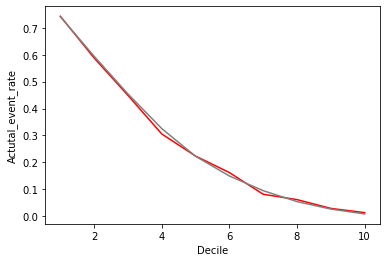

In [81]:
ax = sns.lineplot(x='Decile', y='Actutal_event_rate', data=sorted_reindexed, color='red')
ax = sns.lineplot(x='Decile', y='Predicted_event_rate', data=sorted_reindexed, color='grey')

In [82]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree'] = pd.DataFrame(y_pred_prob)
df['P_Rank_tree'] = pd.qcut(df['pred_prob_dtree'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_tree')['target'].agg(['count', 'mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actutal_event_rate'}, inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'}, inplace=True)
rank_df=pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join='inner')

sorted_rank_df= rank_df.sort_values(by='P_Rank_tree', ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.756028,0.772067,533.0,533.0,0.285179,0.285179,172.0,172.0,0.033243,0.033243,0.2519,0.100099,0.100099,1
1,9,704,0.596591,0.608344,420.0,953.0,0.224719,0.509898,284.0,456.0,0.054890,0.088133,0.4218,0.099957,0.200057,2
2,8,704,0.417614,0.435819,294.0,1247.0,0.157303,0.667202,410.0,866.0,0.079242,0.167375,0.4998,0.099957,0.300014,3
3,7,704,0.326705,0.322880,230.0,1477.0,0.123060,0.790262,474.0,1340.0,0.091612,0.258987,0.5313,0.099957,0.399972,4
4,6,704,0.215909,0.209595,152.0,1629.0,0.081327,0.871589,552.0,1892.0,0.106687,0.365675,0.5059,0.099957,0.499929,5
5,5,705,0.160284,0.154631,113.0,1742.0,0.060460,0.932049,592.0,2484.0,0.114418,0.480093,0.4520,0.100099,0.600028,6
6,4,704,0.110795,0.098992,78.0,1820.0,0.041734,0.973783,626.0,3110.0,0.120990,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.041193,0.037890,29.0,1849.0,0.015516,0.989299,675.0,3785.0,0.130460,0.731542,0.2578,0.099957,0.799943,8
8,2,704,0.017045,0.016893,12.0,1861.0,0.006421,0.995720,692.0,4477.0,0.133746,0.865288,0.1304,0.099957,0.899901,9
9,1,705,0.011348,0.003096,8.0,1869.0,0.004280,1.000000,697.0,5174.0,0.134712,1.000000,-0.0000,0.100099,1.000000,10


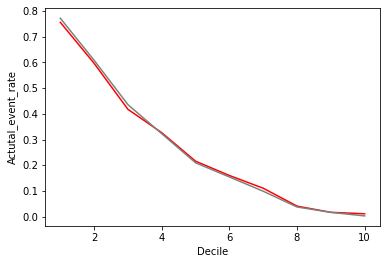

In [83]:
ax = sns.lineplot(x='Decile', y='Actutal_event_rate', data=sorted_reindexed, color='red')
ax = sns.lineplot(x='Decile', y='Predicted_event_rate', data=sorted_reindexed, color='grey')

In [84]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf'] = pd.DataFrame(y_pred_prob)
df['P_Rank_rf'] = pd.qcut(df['pred_prob_rf'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_rf')['target'].agg(['count', 'mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actutal_event_rate'}, inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'}, inplace=True)
rank_df=pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join='inner')

sorted_rank_df= rank_df.sort_values(by='P_Rank_rf', ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.768794,0.683240,542.0,542.0,0.289995,0.289995,163.0,163.0,0.031504,0.031504,0.2585,0.100099,0.100099,1
1,9,704,0.596591,0.542220,420.0,962.0,0.224719,0.514714,284.0,447.0,0.054890,0.086394,0.4283,0.099957,0.200057,2
2,8,704,0.451705,0.426840,318.0,1280.0,0.170144,0.684858,386.0,833.0,0.074604,0.160997,0.5239,0.099957,0.300014,3
3,7,704,0.316761,0.317997,223.0,1503.0,0.119315,0.804173,481.0,1314.0,0.092965,0.253962,0.5502,0.099957,0.399972,4
4,6,704,0.225852,0.242626,159.0,1662.0,0.085072,0.889246,545.0,1859.0,0.105334,0.359296,0.5299,0.099957,0.499929,5
5,5,705,0.124823,0.180473,88.0,1750.0,0.047084,0.936330,617.0,2476.0,0.119250,0.478547,0.4578,0.100099,0.600028,6
6,4,704,0.099432,0.127391,70.0,1820.0,0.037453,0.973783,634.0,3110.0,0.122536,0.601082,0.3727,0.099957,0.699986,7
7,3,704,0.051136,0.080691,36.0,1856.0,0.019262,0.993044,668.0,3778.0,0.129107,0.730189,0.2629,0.099957,0.799943,8
8,2,704,0.017045,0.038349,12.0,1868.0,0.006421,0.999465,692.0,4470.0,0.133746,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.017752,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,0.0000,0.100099,1.000000,10


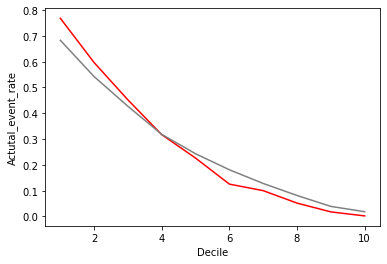

In [85]:
ax = sns.lineplot(x='Decile', y='Actutal_event_rate', data=sorted_reindexed, color='red')
ax = sns.lineplot(x='Decile', y='Predicted_event_rate', data=sorted_reindexed, color='grey')

In [86]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm'] = pd.DataFrame(y_pred_prob)
df['P_Rank_GBM'] = pd.qcut(df['pred_prob_gbm'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_GBM')['target'].agg(['count', 'mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actutal_event_rate'}, inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'}, inplace=True)
rank_df=pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join='inner')

sorted_rank_df= rank_df.sort_values(by='P_Rank_GBM', ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.914894,0.819941,645.0,645.0,0.345104,0.345104,60.0,60.0,0.011596,0.011596,0.3335,0.100099,0.100099,1
1,9,704,0.698864,0.617973,492.0,1137.0,0.263242,0.608347,212.0,272.0,0.040974,0.052571,0.5558,0.099957,0.200057,2
2,8,704,0.478693,0.451557,337.0,1474.0,0.180310,0.788657,367.0,639.0,0.070932,0.123502,0.6652,0.099957,0.300014,3
3,7,704,0.262784,0.305020,185.0,1659.0,0.098983,0.887640,519.0,1158.0,0.100309,0.223811,0.6638,0.099957,0.399972,4
4,6,704,0.161932,0.194536,114.0,1773.0,0.060995,0.948636,590.0,1748.0,0.114032,0.337843,0.6108,0.099957,0.499929,5
5,5,705,0.059574,0.120531,42.0,1815.0,0.022472,0.971108,663.0,2411.0,0.128141,0.465984,0.5051,0.100099,0.600028,6
6,4,704,0.039773,0.072378,28.0,1843.0,0.014981,0.986089,676.0,3087.0,0.130653,0.596637,0.3895,0.099957,0.699986,7
7,3,704,0.025568,0.035795,18.0,1861.0,0.009631,0.995720,686.0,3773.0,0.132586,0.729223,0.2665,0.099957,0.799943,8
8,2,704,0.008523,0.017916,6.0,1867.0,0.003210,0.998930,698.0,4471.0,0.134905,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.010845,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,0.0000,0.100099,1.000000,10


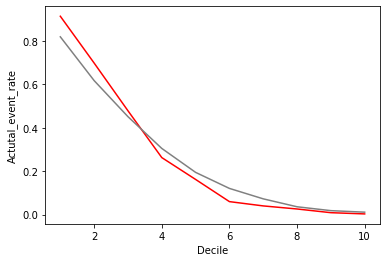

In [87]:
ax = sns.lineplot(x='Decile', y='Actutal_event_rate', data=sorted_reindexed, color='red')
ax = sns.lineplot(x='Decile', y='Predicted_event_rate', data=sorted_reindexed, color='grey')

In [88]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df['pred_prob_stacking'] = pd.DataFrame(y_pred_prob)
df['P_Rank_stacking'] = pd.qcut(df['pred_prob_stacking'].rank(method='first').values, 10, duplicates='drop').codes+1
rank_df_actuals = df.groupby('P_Rank_stacking')['target'].agg(['count', 'mean'])
rank_df_predicted=df.groupby('P_Rank_stacking')['pred_prob_stacking'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean': 'Actutal_event_rate'}, inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'}, inplace=True)
rank_df=pd.concat([rank_df_actuals, rank_df_predicted], axis=1, join='inner')

sorted_rank_df= rank_df.sort_values(by='P_Rank_stacking', ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actutal_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']), 4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_stacking,count,Actutal_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.807092,0.777744,569.0,569.0,0.304441,0.304441,136.0,136.0,0.026285,0.026285,0.2782,0.100099,0.100099,1
1,9,704,0.610795,0.597373,430.0,999.0,0.230070,0.534510,274.0,410.0,0.052957,0.079242,0.4553,0.099957,0.200057,2
2,8,704,0.463068,0.417493,326.0,1325.0,0.174425,0.708935,378.0,788.0,0.073058,0.152300,0.5566,0.099957,0.300014,3
3,7,704,0.318182,0.265994,224.0,1549.0,0.119850,0.828785,480.0,1268.0,0.092772,0.245072,0.5837,0.099957,0.399972,4
4,6,704,0.214489,0.181825,151.0,1700.0,0.080792,0.909577,553.0,1821.0,0.106881,0.351952,0.5576,0.099957,0.499929,5
5,5,705,0.117730,0.130014,83.0,1783.0,0.044409,0.953986,622.0,2443.0,0.120216,0.472169,0.4818,0.100099,0.600028,6
6,4,704,0.073864,0.098053,52.0,1835.0,0.027822,0.981808,652.0,3095.0,0.126015,0.598183,0.3836,0.099957,0.699986,7
7,3,704,0.034091,0.076316,24.0,1859.0,0.012841,0.994650,680.0,3775.0,0.131426,0.729610,0.2650,0.099957,0.799943,8
8,2,704,0.012784,0.060624,9.0,1868.0,0.004815,0.999465,695.0,4470.0,0.134325,0.863935,0.1355,0.099957,0.899901,9
9,1,705,0.001418,0.054436,1.0,1869.0,0.000535,1.000000,704.0,5174.0,0.136065,1.000000,-0.0000,0.100099,1.000000,10


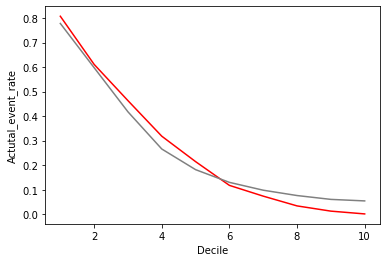

In [89]:
ax = sns.lineplot(x='Decile', y='Actutal_event_rate', data=sorted_reindexed, color='red')
ax = sns.lineplot(x='Decile', y='Predicted_event_rate', data=sorted_reindexed, color='grey')

In [90]:
# Project Conclusion:
# The GBM model has performed the best and will be used for customer targetting
# Within the high value group, we can leverage the model to identify the best targets.

In [91]:
df['Tenure Rank'] = pd.qcut(df['tenure'].rank(method='first').values, 10, duplicates='drop').codes+1

In [92]:
df.groupby('Tenure Rank')['tenure'].agg(['min', 'max', 'mean'])

,min,max,mean
Tenure Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [93]:
df['tenure'].mean()

32.37114865824223

In [94]:
df['Tenure_Segment']=np.where(df['Tenure Rank']<=6,'Low Tenure','High Tenure')

In [95]:
df['MonthlyCharges_Rank'] = pd.qcut(df['MonthlyCharges'].rank(method='first').values, 10, duplicates='drop').codes+1

In [96]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min', 'max', 'mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [97]:
df['MonthlyCharges'].mean()

64.76169246059922

In [98]:
df['Monthly_Charge_Segment'] = np.where(df['MonthlyCharges_Rank']<=5, 'Low Charges', 'High Charges')

In [99]:
df['Predicted_Churn_Rank'] = np.where(df['P_Rank_GBM']>=8, 'Top 3', 'Bottom 7')

# Slice the data with respect to Top 4 and Bottom 6 Probability Ranks from the GBM Model

In [100]:
df_top3=df.loc[df['Predicted_Churn_Rank']=='Top 3', :]

In [101]:
service_list = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']
target = ['target']
total = service_list+target

In [102]:
df_top3_services = df_top3[service_list]

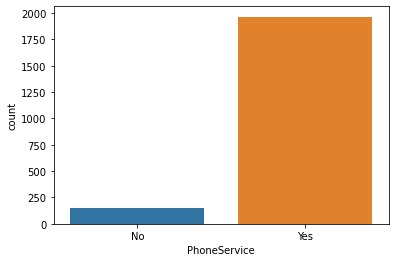

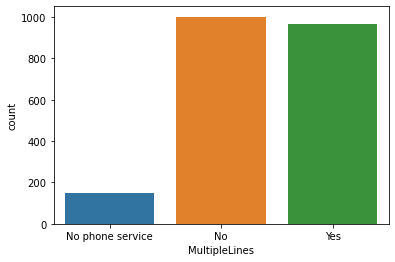

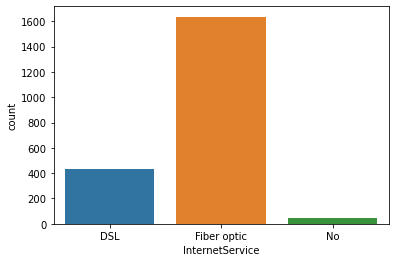

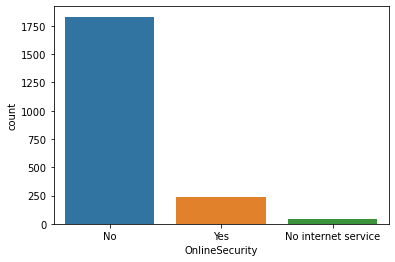

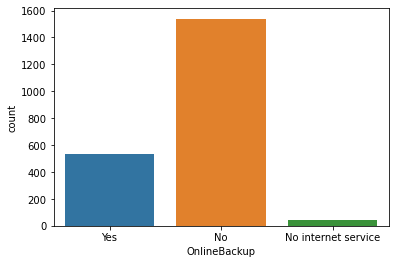

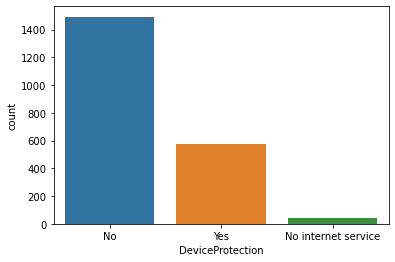

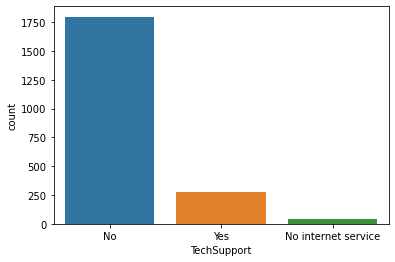

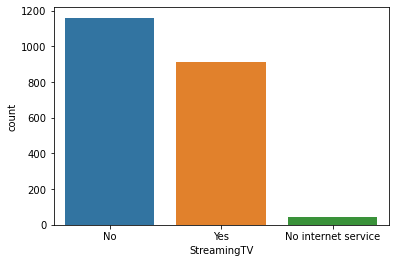

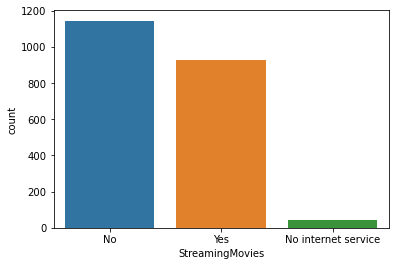

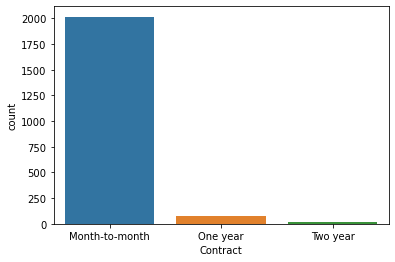

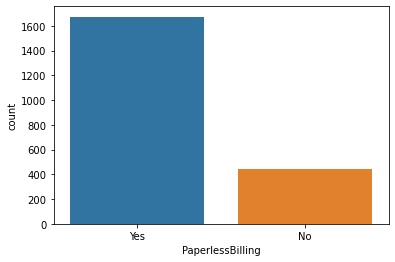

In [103]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

In [104]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'], aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,99.832524,86.68772
Low Charges,47.358824,48.84717


In [105]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['MonthlyCharges'], aggfunc='count')


Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,206,1307
Low Charges,17,583


In [106]:
# Recommendataion
# Device protection with online servies
# Conver customerto DSL if they are facing challanges with fiber optics.
# Offer discounts on yarly contractss